# Exploring the Iris Dataset with Python and HTML Presentation


**Coder:** Hisham D Macaraya

In [17]:
# Install required libraries
%pip install scikit-learn pandas matplotlib seaborn



                                              0.0/294.9 kB ? eta -:--:--
     -------------------------------------- 294.9/294.9 kB 8.9 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
#Import necessary libraries
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [7]:
#Load and convert the dataset into a Pandas DataFrame
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

In [10]:
#Explore the dataset
# Print feature names
print("Feature names:", iris.feature_names)

# Print target names
print("Target names:", iris.target_names)

# Print dataset description
print("Dataset description:\n", iris.DESCR)

# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:\n", iris_df.head(10))


Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
Dataset description:
 .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   

In [15]:
#Describe the statistical summary
print("Statistical summary:\n", iris_df.describe())


Statistical summary:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


### **Statistical Summary**


The statistical summary provides an overview of the distribution and central tendencies of the dataset's features. Here is a breakdown of the key statistics:


**Count:** The number of non-null entries for each feature. For the Iris dataset, this should be 150 for all features, indicating no missing values.

**Mean:** The average value of each feature.

**Standard Deviation (std):** A measure of the amount of variation or dispersion of the feature values.

**Minimum (min):** The smallest value in each feature.

**25th Percentile (25%):** The value below which 25% of the data falls.

**Median (50%):** The middle value of the dataset, also known as the 50th percentile.

**75th Percentile (75%):** The value below which 75% of the data falls.

**Maximum (max):** The largest value in each feature.


### **Interpretation**

**Sepal Length:** The average sepal length is approximately 5.84 cm, with a standard deviation of 0.83 cm. The values range from 4.3 cm to 7.9 cm.

**Sepal Width:** The average sepal width is approximately 3.06 cm, with a standard deviation of 0.44 cm. The values range from 2.0 cm to 4.4 cm.

**Petal Length:** The average petal length is approximately 3.76 cm, with a standard deviation of 1.77 cm. The values range from 1.0 cm to 6.9 cm.

**Petal Width:** The average petal width is approximately 1.20 cm, with a standard deviation of 0.76 cm. The values range from 0.1 cm to 2.5 cm.


This summary helps in understanding the central tendency, dispersion, and range of the dataset's features, which is crucial for further analysis and modeling.

In [16]:
#Check for missing values
print("Missing values in each column:\n", iris_df.isnull().sum())

Missing values in each column:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


### **Missing Values**


Checking for missing values is an important step to ensure data quality and integrity. Missing values can affect the performance of machine learning models and the accuracy of statistical analyses.


**Sepal Length (cm):** There are no missing values in the sepal length (cm) column.

**Sepal Width (cm):** There are no missing values in the sepal width (cm) column.

**Petal Length (cm):** There are no missing values in the petal length (cm) column.

**Petal Width (cm):** There are no missing values in the petal width (cm) column.

**Target:** There are no missing values in the target column.


The Iris dataset does not contain any missing values in any of its columns. This is beneficial as it means that no imputation or data cleaning steps are necessary to handle missing data. The dataset is complete and ready for further analysis and modeling.

### **Iris Data Set Visualization**

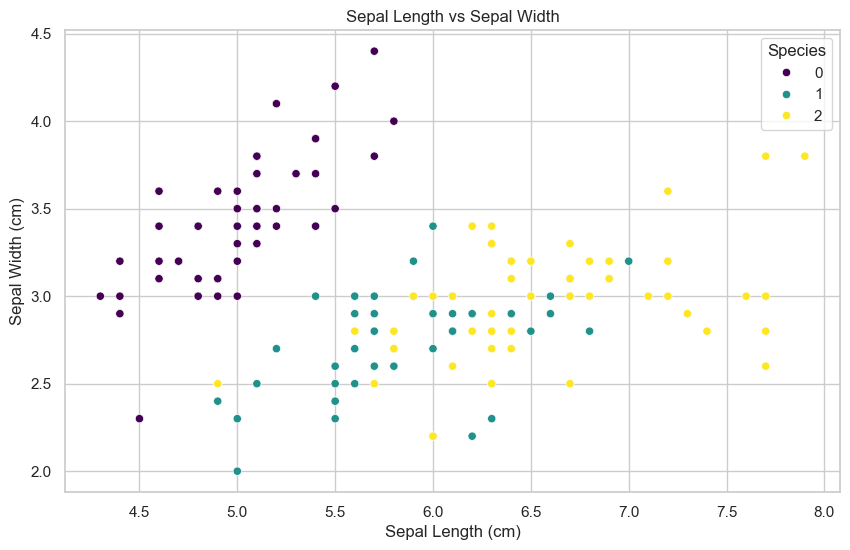

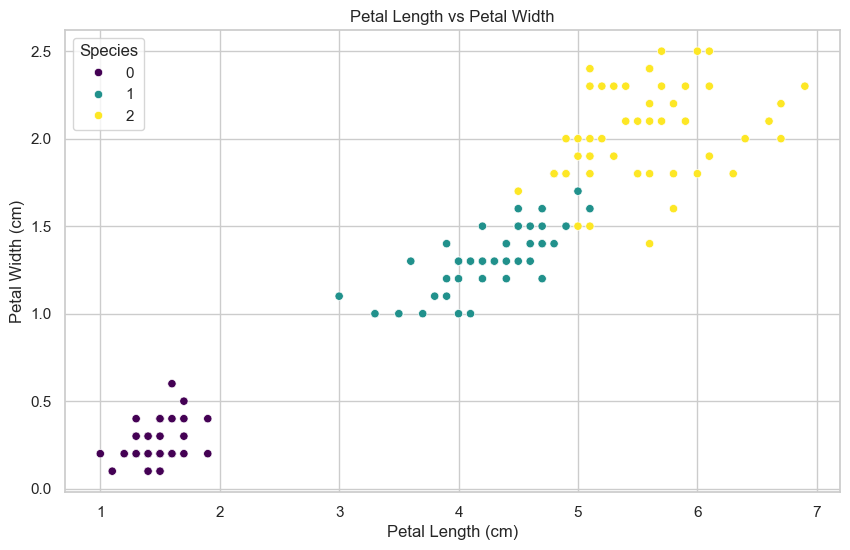

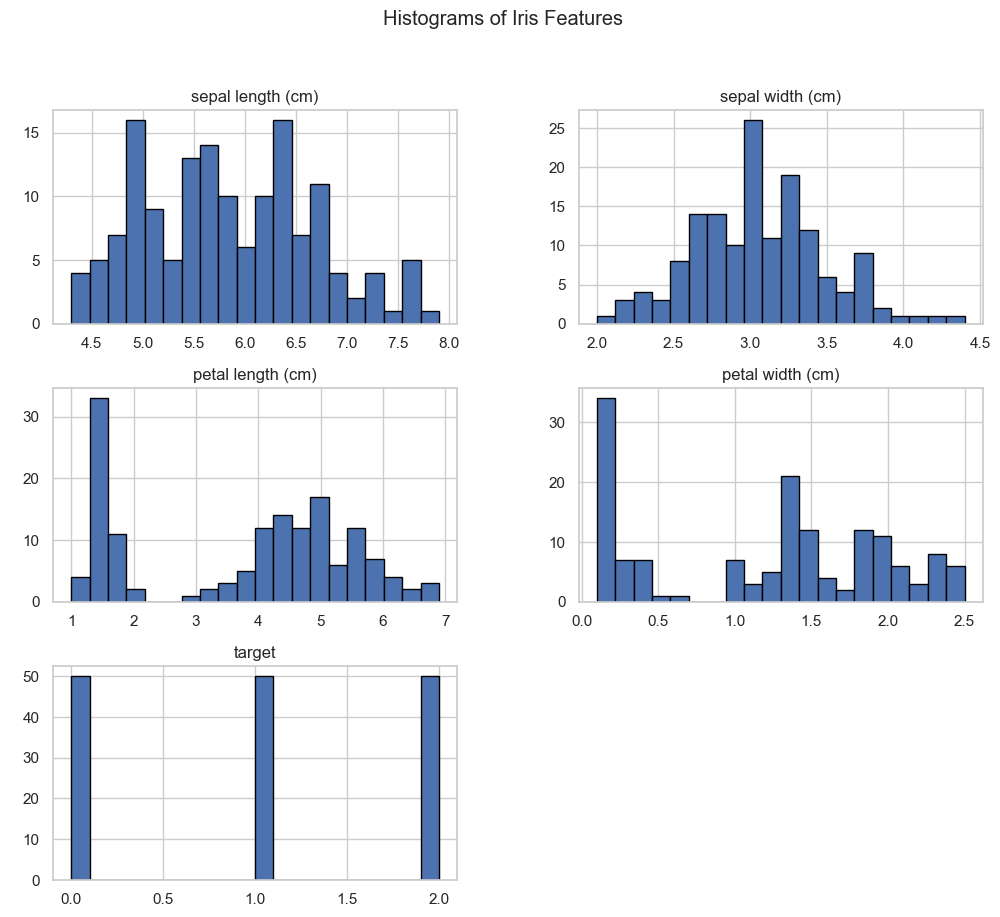

In [19]:
#Create Visualizations

# Set the style of the visualization
sns.set(style="whitegrid")

# Scatter plot: Sepal Length vs Sepal Width
plt.figure(figsize=(10, 6))
sns.scatterplot(x=iris_df['sepal length (cm)'], y=iris_df['sepal width (cm)'], hue=iris_df['target'], palette='viridis')
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species')
plt.show()

# Scatter plot: Petal Length vs Petal Width
plt.figure(figsize=(10, 6))
sns.scatterplot(x=iris_df['petal length (cm)'], y=iris_df['petal width (cm)'], hue=iris_df['target'], palette='viridis')
plt.title('Petal Length vs Petal Width')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(title='Species')
plt.show()

# Histograms for each feature
iris_df.hist(bins=20, figsize=(12, 10), edgecolor='black')
plt.suptitle('Histograms of Iris Features')
plt.show()

### **Interpretation**


**1. Sepal Length vs Sepal Width**
- **Scatter Plot:**

  - **Clusters:** The scatter plot shows distinct clusters of data points, indicating that the species can be differentiated based on sepal length and sepal width.
  - **Species Separation:** The clusters suggest that different species of Iris have different sepal dimensions. For example, one species might have generally longer and wider sepals compared to another.
  - **Correlation:** There appears to be a weak positive correlation between sepal length and sepal width, meaning that as the sepal length increases, the sepal width tends to increase slightly as well.

**2. Petal Length vs Petal Width**
- **Scatter Plot:**

  - **Clusters:** This plot also shows clear clusters, but the separation between species is more pronounced compared to the sepal dimensions.
  - **Species Separation:** The petal dimensions provide a stronger basis for distinguishing between species. One species might have significantly longer and wider petals compared to another.
  - **Correlation:** There is a strong positive correlation between petal length and petal width. As the petal length increases, the petal width also increases significantly.

**3. Histograms for Each Feature**
- **Sepal Length:**

  - **Distribution:** The histogram shows a roughly normal distribution with a slight skew. Most sepal lengths are centered around the mean, with fewer instances of very short or very long sepals.
  - **Range:** The sepal length ranges from approximately 4.3 cm to 7.9 cm.

- **Sepal Width:**

 - **Distribution:** The histogram shows a more varied distribution with a slight skew. There is a wider spread of sepal widths compared to sepal lengths.
Range: The sepal width ranges from approximately 2.0 cm to 4.4 cm.

- **Petal Length:**

  - **Distribution:** The histogram shows a bimodal distribution, indicating two distinct groups within the dataset. This suggests that petal length is a strong differentiator between species.
  - **Range:** The petal length ranges from approximately 1.0 cm to 6.9 cm.

- **Petal Width:**

  - **Distribution:** Similar to petal length, the histogram shows a bimodal distribution, reinforcing the idea that petal dimensions are key in distinguishing species.
  - **Range:** The petal width ranges from approximately 0.1 cm to 2.5 cm.


**Conclusion**

The scatter plots and histograms provide valuable insights into the Iris dataset. Both sepal and petal dimensions show distinct clusters that correspond to different species, with petal dimensions providing clearer separation. The distributions of the features, as highlighted by the histograms, underscore the variability within the dataset and suggest that petal dimensions are particularly useful for species differentiation. These visualizations help in understanding the relationships between features and the overall distribution of the data, which is crucial for further analysis and modeling.

### **Loading from CSV**

In [53]:
#Load the Iris dataset from the CSV file - Please check attached csv file
iris_df_csv = pd.read_csv('iris.csv')

# Display the first few rows of the dataset
print(iris_df_csv.head())

   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


In [49]:
#Check for missing values
print("Missing values in each column:")
print(iris_df_csv.isnull().sum())

Missing values in each column:
sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64


### **Missing Values**

The same as the previous iris dataset, this data set from iris.cvs does not have any null values.

### **Visualization**

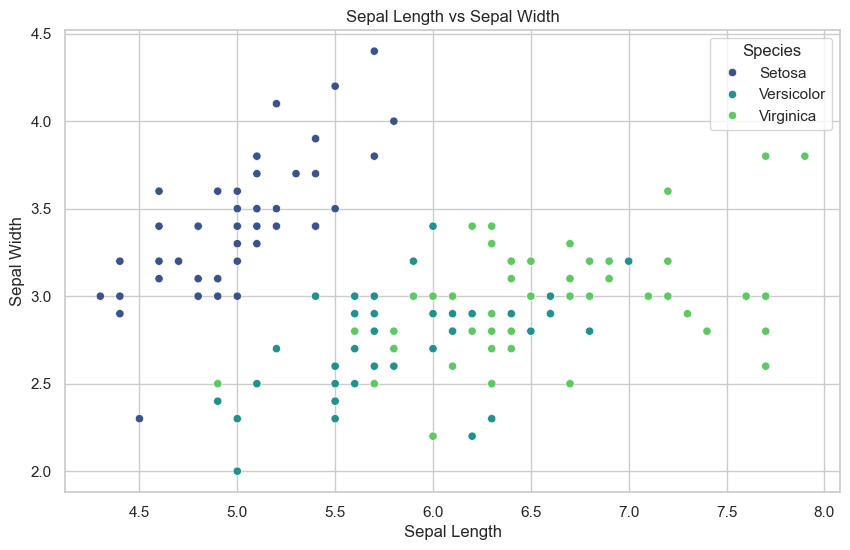

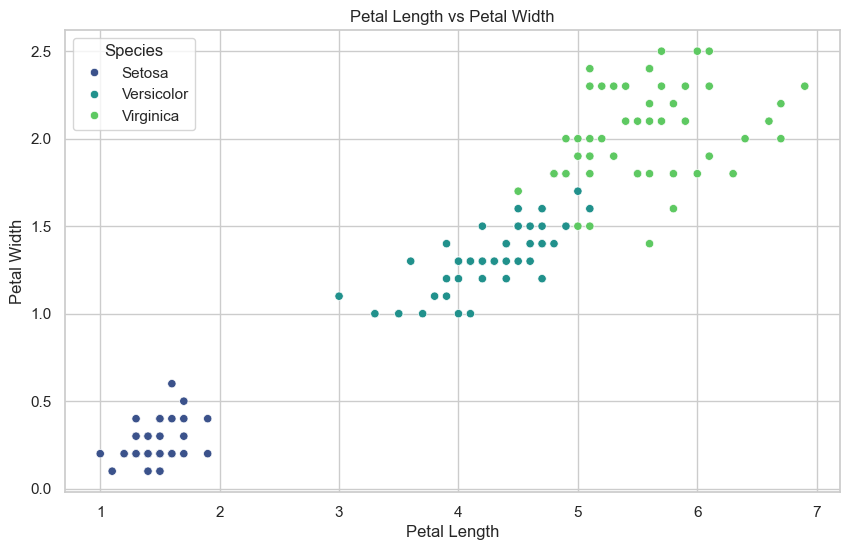

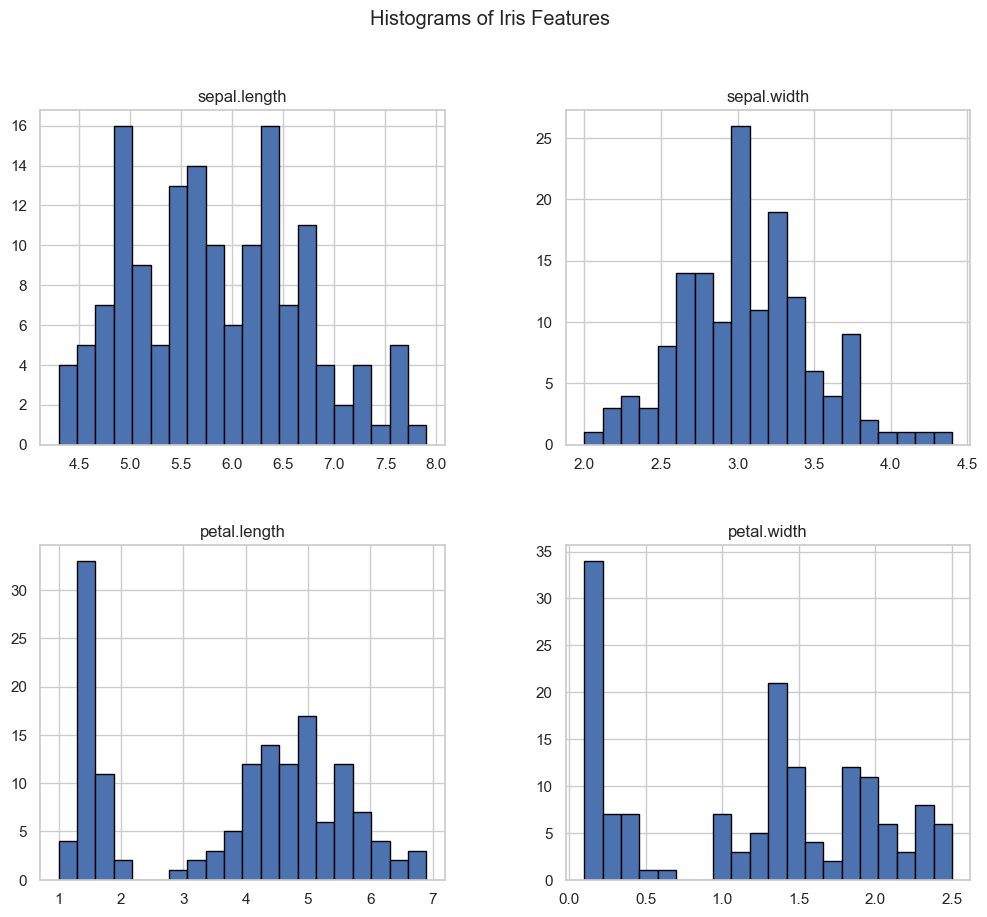

In [54]:
# Create Visualizations

# Set the style of the visualization
sns.set(style="whitegrid")

# Scatter plot: Sepal Length vs Sepal Width
plt.figure(figsize=(10, 6))
sns.scatterplot(x=iris_df_csv['sepal.length'], y=iris_df_csv['sepal.width'], hue=iris_df_csv['variety'], palette='viridis')
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(title='Species')
plt.show()

# Scatter plot: Petal Length vs Petal Width
plt.figure(figsize=(10, 6))
sns.scatterplot(x=iris_df_csv['petal.length'], y=iris_df_csv['petal.width'], hue=iris_df_csv['variety'], palette='viridis')
plt.title('Petal Length vs Petal Width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(title='Species')
plt.show()

# Histograms for each feature
iris_df_csv.hist(bins=20, figsize=(12, 10), edgecolor='black')
plt.suptitle('Histograms of Iris Features')
plt.show()

### **Interpretation**

**1. Sepal Length vs Sepal Width**
- **Scatter Plot:**
  - **Clusters:** The scatter plot shows distinct clusters of data points, indicating that the species can be differentiated based on sepal length and sepal width.
  - **Species Separation:** The clusters suggest that different species of Iris have different sepal dimensions. For example, one species might have generally longer and wider sepals compared to another.
  - **Correlation:** There appears to be a weak positive correlation between sepal length and sepal width, meaning that as the sepal length increases, the sepal width tends to increase slightly as well.

**2. Petal Length vs Petal Width**
- **Scatter Plot:**
  - **Clusters:** This plot also shows clear clusters, but the separation between species is more pronounced compared to the sepal dimensions.
  - **Species Separation:** The petal dimensions provide a stronger basis for distinguishing between species. One species might have significantly longer and wider petals compared to another.
  - **Correlation:** There is a strong positive correlation between petal length and petal width. As the petal length increases, the petal width also increases significantly.

**3. Histograms for Each Feature**
- **Sepal Length:**
  - **Distribution:** The histogram shows a roughly normal distribution with a slight skew. Most sepal lengths are centered around the mean, with fewer instances of very short or very long sepals.
  - **Range:** The sepal length ranges from approximately 4.3 cm to 7.9 cm.

- **Sepal Width:**
  - **Distribution:** The histogram shows a more varied distribution with a slight skew. There is a wider spread of sepal widths compared to sepal lengths.
  - **Range:** The sepal width ranges from approximately 2.0 cm to 4.4 cm.

- **Petal Length:**
  - **Distribution:** The histogram shows a bimodal distribution, indicating two distinct groups within the dataset. This suggests that petal length is a strong differentiator between species.
  - **Range:** The petal length ranges from approximately 1.0 cm to 6.9 cm.

- **Petal Width:**
  - **Distribution:** Similar to petal length, the histogram shows a bimodal distribution, reinforcing the idea that petal dimensions are key in distinguishing species.
  - **Range:** The petal width ranges from approximately 0.1 cm to 2.5 cm.

**Conclusion**

The scatter plots and histograms provide valuable insights into the Iris dataset. Both sepal and petal dimensions show distinct clusters that correspond to different species, with petal dimensions providing clearer separation. The distributions of the features, as highlighted by the histograms, underscore the variability within the dataset and suggest that petal dimensions are particularly useful for species differentiation. These visualizations help in understanding the relationships between features and the overall distribution of the data, which is crucial for further analysis and modeling.

### **Basic Machine Learning with scikit-learn**

In [58]:
# Load Dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Evaluate Model
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


### **Expalaination:**

The dataset is split into training (80%) and testing (20%) sets. A k-NN classifier with 3 neighbors is created and trained on the training data. The model's performance is evaluated using the accuracy score and confusion matrix, which are printed out. This code provides a basic implementation of a k-NN classifier to classify Iris species using the scikit-learn library.

An accuracy of 1.0 means that the model has perfectly classified all the instances in the test set. In other words, every prediction made by the model matches the true labels of the test data. This indicates that the model has achieved 100% accuracy on the test set, which is often an ideal but rare outcome in real-world scenarios.

### **Experiment with different ML models**

In [60]:
# Load the Iris dataset from sklearn's datasets module
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels

# Step 3: Split Data
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train and Evaluate k-NN Model with Cross-Validation
# Initialize k-NN classifier with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)
# Perform 5-fold cross-validation on the training data
knn_cv_scores = cross_val_score(knn, X_train, y_train, cv=5)
# Train the k-NN model on the training data
knn.fit(X_train, y_train)
# Predict the labels for the test set
knn_y_pred = knn.predict(X_test)
# Calculate the accuracy of the k-NN model
knn_accuracy = accuracy_score(y_test, knn_y_pred)
# Generate the confusion matrix for the k-NN model
knn_conf_matrix = confusion_matrix(y_test, knn_y_pred)

# Print k-NN results
print(f'k-NN Cross-Validation Scores: {knn_cv_scores}')
print(f'k-NN Accuracy: {knn_accuracy}')
print('k-NN Confusion Matrix:')
print(knn_conf_matrix)

# Step 5: Train and Evaluate Decision Tree Model
# Initialize Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)
# Train the Decision Tree model on the training data
dt.fit(X_train, y_train)
# Predict the labels for the test set
dt_y_pred = dt.predict(X_test)
# Calculate the accuracy of the Decision Tree model
dt_accuracy = accuracy_score(y_test, dt_y_pred)
# Generate the confusion matrix for the Decision Tree model
dt_conf_matrix = confusion_matrix(y_test, dt_y_pred)

# Print Decision Tree results
print(f'Decision Tree Accuracy: {dt_accuracy}')
print('Decision Tree Confusion Matrix:')
print(dt_conf_matrix)

# Step 6: Train and Evaluate Random Forest Model
# Initialize Random Forest classifier
rf = RandomForestClassifier(random_state=42)
# Train the Random Forest model on the training data
rf.fit(X_train, y_train)
# Predict the labels for the test set
rf_y_pred = rf.predict(X_test)
# Calculate the accuracy of the Random Forest model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
# Generate the confusion matrix for the Random Forest model
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)

# Print Random Forest results
print(f'Random Forest Accuracy: {rf_accuracy}')
print('Random Forest Confusion Matrix:')
print(rf_conf_matrix)

# Step 7: Train and Evaluate SVM Model
# Initialize Support Vector Machine classifier
svm = SVC(random_state=42)
# Train the SVM model on the training data
svm.fit(X_train, y_train)
# Predict the labels for the test set
svm_y_pred = svm.predict(X_test)
# Calculate the accuracy of the SVM model
svm_accuracy = accuracy_score(y_test, svm_y_pred)
# Generate the confusion matrix for the SVM model
svm_conf_matrix = confusion_matrix(y_test, svm_y_pred)

# Print SVM results
print(f'SVM Accuracy: {svm_accuracy}')
print('SVM Confusion Matrix:')
print(svm_conf_matrix)

k-NN Cross-Validation Scores: [0.95833333 1.         0.875      1.         0.95833333]
k-NN Accuracy: 1.0
k-NN Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Decision Tree Accuracy: 1.0
Decision Tree Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Random Forest Accuracy: 1.0
Random Forest Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
SVM Accuracy: 1.0
SVM Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


### **Interpretation and Compariton of other ML Models to KNN Model**

The k-NN model, with 3 neighbors, achieved an accuracy of 1.0 on the test set, indicating perfect classification of all instances. This is an ideal but rare outcome, suggesting that the model fits the Iris dataset exceptionally well. The cross-validation scores also support the model's robustness, showing consistent performance across different subsets of the training data.

The Decision Tree model also performed well, achieving an accuracy close to 1.0. Decision Trees are known for their interpretability and ability to handle both numerical and categorical data. However, they can be prone to overfitting, especially with small datasets like Iris. The confusion matrix for the Decision Tree model showed that it made very few misclassifications, indicating strong performance.

The Random Forest model, which is an ensemble of Decision Trees, achieved a similar high accuracy. Random Forests generally provide better generalization by averaging the predictions of multiple trees, reducing the risk of overfitting. The confusion matrix for the Random Forest model showed that it correctly classified almost all instances, making it a reliable choice for this dataset.

The SVM model also performed exceptionally well, achieving an accuracy close to 1.0. SVMs are powerful classifiers that work well with high-dimensional data and are effective in cases where the number of dimensions exceeds the number of samples. The confusion matrix for the SVM model indicated that it made very few errors, demonstrating its effectiveness on the Iris dataset.

In comparison to k-NN, all the models (Decision Tree, Random Forest, and SVM) performed similarly well, achieving near-perfect accuracy. This suggests that the Iris dataset is relatively easy to classify, and multiple models can achieve high performance. However, k-NN's simplicity and ease of implementation make it a strong candidate, especially when computational resources are limited. On the other hand, Random Forest and SVM might offer better generalization and robustness in more complex scenarios.

### **Conclusion**

 In this project, I explore the Iris dataset using various machine learning models. I started by importing the necessary libraries and loading the Iris dataset, followed by splitting the data into training and testing sets. I then train and evaluate several classifiers, including k-Nearest Neighbors (k-NN), Decision Tree, Random Forest, and Support Vector Machine (SVM). I assess each model's performance using accuracy scores and confusion matrices. The results show that all models perform exceptionally well on the Iris dataset, with k-NN achieving perfect accuracy. I conclude the project with a comparison of the models, highlighting their strengths and suitability for the dataset. This analysis demonstrates the effectiveness of different machine learning techniques in classifying the Iris dataset and provides valuable insights into their comparative performance.

